In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as prepro
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from collections import Counter

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
train =pd.read_csv('/content/drive/My Drive/SoftComLab/Project/train.csv')
test =pd.read_csv('/content/drive/My Drive/SoftComLab/Project/test.csv')

In [66]:
X=train.copy()

In [67]:
print("The size of the train data is:", X.shape)
print("The size of the test data is:", test.shape)

The size of the train data is: (878049, 9)
The size of the test data is: (884262, 7)


In [28]:
X.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [29]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [68]:
for i in ['DayOfWeek', 'PdDistrict', 'Address', 'Category']:
    X[i] = prepro.LabelEncoder().fit_transform(X[i])
    if i not in ['Category']:
        test[i] = prepro.LabelEncoder().fit_transform(test[i])

In [31]:
X.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,37,WARRANT ARREST,6,4,"ARREST, BOOKED",19790,-122.425892,37.774599
1,2015-05-13 23:53:00,21,TRAFFIC VIOLATION ARREST,6,4,"ARREST, BOOKED",19790,-122.425892,37.774599
2,2015-05-13 23:33:00,21,TRAFFIC VIOLATION ARREST,6,4,"ARREST, BOOKED",22697,-122.424363,37.800414
3,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,6,4,NONE,4266,-122.426995,37.800873
4,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,6,5,NONE,1843,-122.438738,37.771541


In [32]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,3,0,6407,-122.399588,37.735051
1,1,2015-05-10 23:51:00,3,0,9744,-122.391523,37.732432
2,2,2015-05-10 23:50:00,3,4,6336,-122.426002,37.792212
3,3,2015-05-10 23:45:00,3,2,10633,-122.437394,37.721412
4,4,2015-05-10 23:45:00,3,2,10633,-122.437394,37.721412


In [69]:
X['year'] = pd.to_datetime(X['Dates']).dt.year
X['month'] = pd.to_datetime(X['Dates']).dt.month
X['day'] = pd.to_datetime(X['Dates']).dt.day
X['hour'] = pd.to_datetime(X['Dates']).dt.hour
X['minute'] = pd.to_datetime(X['Dates']).dt.minute

test['year'] = pd.to_datetime(test['Dates']).dt.year
test['month'] = pd.to_datetime(test['Dates']).dt.month
test['day'] = pd.to_datetime(test['Dates']).dt.day
test['hour'] = pd.to_datetime(test['Dates']).dt.hour
test['minute'] = pd.to_datetime(test['Dates']).dt.minute
   

In [70]:
X.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,hour,minute
0,2015-05-13 23:53:00,37,WARRANT ARREST,6,4,"ARREST, BOOKED",19790,-122.425892,37.774599,2015,5,13,23,53
1,2015-05-13 23:53:00,21,TRAFFIC VIOLATION ARREST,6,4,"ARREST, BOOKED",19790,-122.425892,37.774599,2015,5,13,23,53
2,2015-05-13 23:33:00,21,TRAFFIC VIOLATION ARREST,6,4,"ARREST, BOOKED",22697,-122.424363,37.800414,2015,5,13,23,33
3,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,6,4,NONE,4266,-122.426995,37.800873,2015,5,13,23,30
4,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,6,5,NONE,1843,-122.438738,37.771541,2015,5,13,23,30


In [71]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute
0,0,2015-05-10 23:59:00,3,0,6407,-122.399588,37.735051,2015,5,10,23,59
1,1,2015-05-10 23:51:00,3,0,9744,-122.391523,37.732432,2015,5,10,23,51
2,2,2015-05-10 23:50:00,3,4,6336,-122.426002,37.792212,2015,5,10,23,50
3,3,2015-05-10 23:45:00,3,2,10633,-122.437394,37.721412,2015,5,10,23,45
4,4,2015-05-10 23:45:00,3,2,10633,-122.437394,37.721412,2015,5,10,23,45


In [72]:
for i in [[6, 'month'], [8, 'hour'], [10, 'day']]:
    feature = i[1]
    bins = i[0]
    X[feature+' bin'] = np.floor_divide(X[feature], len(np.unique(X[feature]))/bins)

In [73]:
X.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,hour,minute,month bin,hour bin,day bin
0,2015-05-13 23:53:00,37,WARRANT ARREST,6,4,"ARREST, BOOKED",19790,-122.425892,37.774599,2015,5,13,23,53,2,7,4
1,2015-05-13 23:53:00,21,TRAFFIC VIOLATION ARREST,6,4,"ARREST, BOOKED",19790,-122.425892,37.774599,2015,5,13,23,53,2,7,4
2,2015-05-13 23:33:00,21,TRAFFIC VIOLATION ARREST,6,4,"ARREST, BOOKED",22697,-122.424363,37.800414,2015,5,13,23,33,2,7,4
3,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,6,4,NONE,4266,-122.426995,37.800873,2015,5,13,23,30,2,7,4
4,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,6,5,NONE,1843,-122.438738,37.771541,2015,5,13,23,30,2,7,4


In [74]:
y = X['Category']
X = X.drop(['Descript', 'Resolution', 'Dates', 'Category'], axis=1)
test = test.drop(['Dates', 'Id'], axis=1)

In [75]:
X.head()

,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute,month bin,hour bin,day bin
0,6,4,19790,-122.425892,37.774599,2015,5,13,23,53,2,7,4
1,6,4,19790,-122.425892,37.774599,2015,5,13,23,53,2,7,4
2,6,4,22697,-122.424363,37.800414,2015,5,13,23,33,2,7,4
3,6,4,4266,-122.426995,37.800873,2015,5,13,23,30,2,7,4
4,6,5,1843,-122.438738,37.771541,2015,5,13,23,30,2,7,4


In [76]:
test.head()

,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute
0,3,0,6407,-122.399588,37.735051,2015,5,10,23,59
1,3,0,9744,-122.391523,37.732432,2015,5,10,23,51
2,3,4,6336,-122.426002,37.792212,2015,5,10,23,50
3,3,2,10633,-122.437394,37.721412,2015,5,10,23,45
4,3,2,10633,-122.437394,37.721412,2015,5,10,23,45


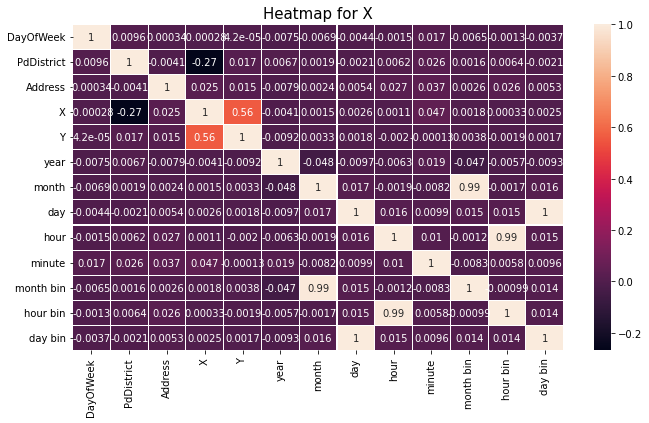

In [77]:
fig = plt.figure(figsize=(11, 6))
sns.heatmap(X.corr(), annot=True, linewidths=.1)
plt.title('Heatmap for X', fontsize=15)
plt.show()

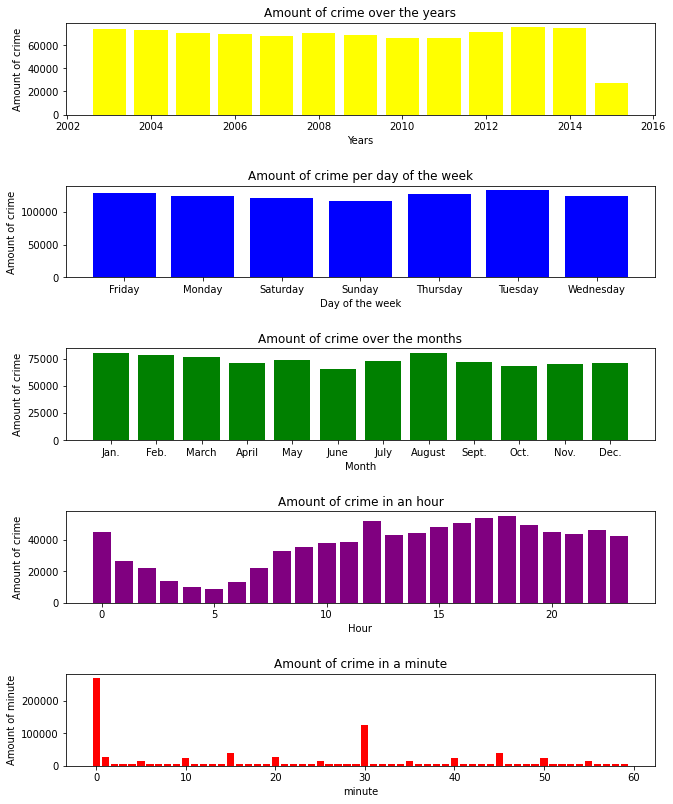

In [78]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 12))
fig.tight_layout(pad=5.0)

count = Counter(X['year'])
ax1.bar(count.keys(), count.values(), color='yellow')
ax1.set_title('Amount of crime over the years')
ax1.set_ylabel('Amount of crime')
ax1.set_xlabel('Years')

count = Counter(X['DayOfWeek'])
ax2.bar(np.unique(train['DayOfWeek']), count.values(), color='blue')
ax2.set_title('Amount of crime per day of the week')
ax2.set_ylabel('Amount of crime')
ax2.set_xlabel('Day of the week')

count = Counter(X['month'])
ax3.bar(['Jan.', 'Feb.', 'March', 'April', 'May', 'June', 'July', 'August','Sept.','Oct.','Nov.','Dec.'],count.values(),color='green')
ax3.set_title('Amount of crime over the months')
ax3.set_ylabel('Amount of crime')
ax3.set_xlabel('Month')

count = Counter(X['hour'])
ax4.bar(count.keys(), count.values(), color='purple')
ax4.set_title('Amount of crime in an hour')
ax4.set_ylabel('Amount of crime')
ax4.set_xlabel('Hour')

count = Counter(X['minute'])
ax5.bar(count.keys(), count.values(), color='red')
ax5.set_title('Amount of crime in a minute')
ax5.set_ylabel('Amount of minute')
ax5.set_xlabel('minute')

plt.show()

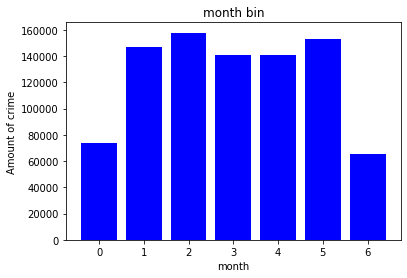

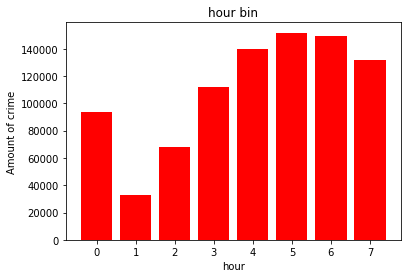

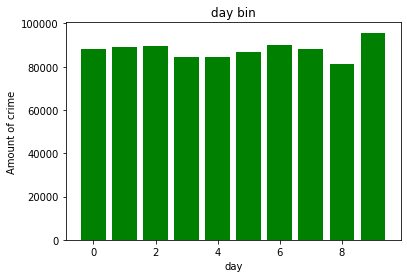

In [80]:
for i in [['month bin', 'blue'], ['hour bin', 'red'], ['day bin', 'green']]:
    count = Counter(X[i[0]])
    color = i[1]
    plt.bar(count.keys(), count.values(), color=color)
    plt.title(i[0])
    plt.ylabel('Amount of crime')
    plt.xlabel(i[0].split()[0])
    plt.show()

In [81]:
y = to_categorical(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.2)
X_train = prepro.StandardScaler().fit_transform(X_train)
X_val = prepro.StandardScaler().fit_transform(X_val)

Epoch 1/100
2195/2195 [==============================] - 13s 5ms/step - loss: 2.7085 - accuracy: 0.2063 - val_loss: 2.5538 - val_accuracy: 0.2315
Epoch 2/100
2195/2195 [==============================] - 13s 6ms/step - loss: 2.5357 - accuracy: 0.2373 - val_loss: 2.5287 - val_accuracy: 0.2381
Epoch 3/100
2195/2195 [==============================] - 10s 5ms/step - loss: 2.5144 - accuracy: 0.2442 - val_loss: 2.5081 - val_accuracy: 0.2442
Epoch 4/100
2195/2195 [==============================] - 12s 5ms/step - loss: 2.4973 - accuracy: 0.2477 - val_loss: 2.4894 - val_accuracy: 0.2529
Epoch 5/100
2195/2195 [==============================] - 12s 6ms/step - loss: 2.4826 - accuracy: 0.2502 - val_loss: 2.4852 - val_accuracy: 0.2496
Epoch 6/100
2195/2195 [==============================] - 10s 5ms/step - loss: 2.4789 - accuracy: 0.2506 - val_loss: 2.4815 - val_accuracy: 0.2555
Epoch 7/100
2195/2195 [==============================] - 10s 5ms/step - loss: 2.4806 - accuracy: 0.2515 - val_loss: 2.4926 -

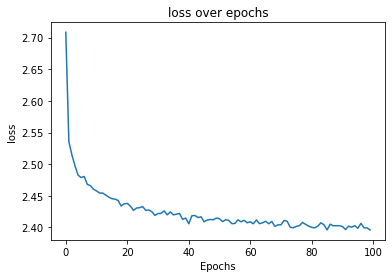

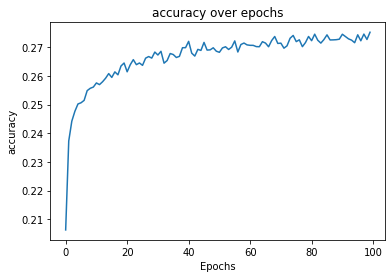

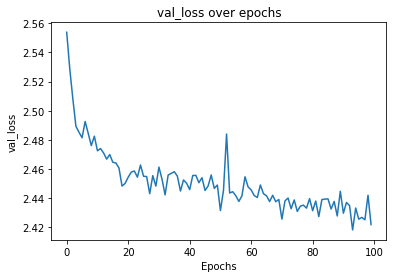

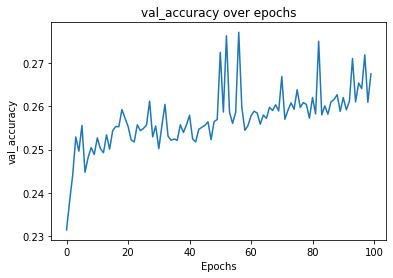

In [82]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(39, activation='softmax'))
    
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='adam')   
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=100, steps_per_epoch=2195)
        
for j in list(history.history.keys()):
    plt.plot(history.history[j])
    plt.title(j + ' over epochs')
    plt.ylabel(j)
    plt.xlabel('Epochs')
    plt.show()